In [3]:
import random

def generate_random_spectrum(num_test_cases, num_statements, num_buggy_statements):
    """
    Generate a random spectrum with multiple buggy statements.

    Parameters:
    - num_test_cases: int, number of test cases
    - num_statements: int, number of statements in the program
    - num_buggy_statements: int, number of statements to designate as buggy

    Returns:
    - spectrum_matrix: list of list of int, matrix representing test case execution (0 or 1)
    - buggy_statements: list of int, indices of the buggy statements
    - outcome_vector: list of int, vector representing test case outcomes (1 for fail, 0 for pass)
    """
    # Choose multiple random buggy statement indices
    buggy_statements = random.sample(range(num_statements), num_buggy_statements)
    
    spectrum_matrix = []
    outcome_vector = []

    for _ in range(num_test_cases):
        test_case = [random.randint(0, 1) for _ in range(num_statements)]
        spectrum_matrix.append(test_case)

        if any(test_case[i] == 1 for i in buggy_statements):
            outcome_vector.append(1)  # Test case failed
        else:
            outcome_vector.append(0)  # Test case passed

    return spectrum_matrix, buggy_statements, outcome_vector

def generate_dataset(num_programs, num_test_cases, num_statements, num_buggy_statements):
    """
    Generate a dataset of programs with random spectra.

    Parameters:
    - num_programs: int, number of programs to generate
    - num_test_cases: int, number of test cases per program
    - num_statements: int, number of statements in each program
    - num_buggy_statements: int, number of statements to designate as buggy

    Returns:
    - dataset: list of tuples, each tuple containing (spectrum_matrix, buggy_statements, outcome_vector)
    """
    dataset = []
    
    for _ in range(num_programs):
        spectrum_matrix, buggy_statements, outcome_vector = generate_random_spectrum(num_test_cases, num_statements, num_buggy_statements)
        dataset.append((spectrum_matrix, buggy_statements, outcome_vector))
    
    return dataset

# Parameters for dataset generation
num_programs = 1000
num_test_cases = 50
num_statements = 500
num_buggy_statements = 1 # Example: designate 3 statements as buggy

# Generate the dataset
dataset = generate_dataset(num_programs, num_test_cases, num_statements, num_buggy_statements)

# Example usage: Accessing the first program's data
first_program_spectrum, first_program_buggy_statements, first_program_outcome = dataset[0]
print("First Program Spectrum Matrix:")
for row in first_program_spectrum:
    print(row)

print("\nFirst Program Buggy Statements Indices:", first_program_buggy_statements)
print("\nFirst Program Outcome Vector:", first_program_outcome)


First Program Spectrum Matrix:
[1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,

[0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]


In [12]:
import numpy as np
import networkx as nx
import os
import pickle

def create_bipartite_graph(spectrum, test_case_outcomes, buggy_statements):
    # Convert spectrum to a NumPy array if it's not already one
    spectrum = np.array(spectrum)
    
    # Create a new graph
    G = nx.Graph()

    num_test_cases, num_statements = spectrum.shape

    # Add test case nodes
    test_case_nodes = range(num_test_cases)
    G.add_nodes_from(test_case_nodes, bipartite=0)

    # Add statement nodes
    statement_nodes = range(num_test_cases, num_test_cases + num_statements)
    G.add_nodes_from(statement_nodes, bipartite=1)

    # Add outcome nodes (pass or fail)
    outcome_nodes = ["Pass", "Fail"]
    G.add_nodes_from(outcome_nodes, bipartite=2)

    # Connect test case nodes to statement nodes based on spectrum
    for i in range(num_test_cases):
        for j in range(num_statements):
            if spectrum[i][j] == 1:
                G.add_edge(i, num_test_cases + j)

    # Connect test case nodes to outcome nodes based on test_case_outcomes
    for i, outcome in enumerate(test_case_outcomes):
        if outcome == 1:  # Failed test case
            G.add_edge(i, "Fail")
        else:  # Passed test case
            G.add_edge(i, "Pass")

    # Add bug label attributes to statement nodes
    bug_labels = {num_test_cases + i: (1 if i in buggy_statements else 0) for i in range(num_statements)}
    nx.set_node_attributes(G, bug_labels, 'bug_label')

    # Add other graph attributes
    G.graph['spectrum_matrix'] = spectrum
    G.graph['test_case_outcomes'] = test_case_outcomes
    G.graph['buggy_statements'] = buggy_statements

    return G

# Create a directory to store the graphs
if not os.path.exists('graphs'):
    os.makedirs('graphs')

# Example usage: Create and store graphs from the dataset
for i in range(1000):
    first_program_spectrum, first_program_buggy_statements, first_program_outcome = dataset[i]

    G = create_bipartite_graph(first_program_spectrum, first_program_outcome, first_program_buggy_statements)
    
    # Store the graph
    with open(f'graphs/graph_{i}.pickle', 'wb') as f:
        pickle.dump(G, f)


552
12684


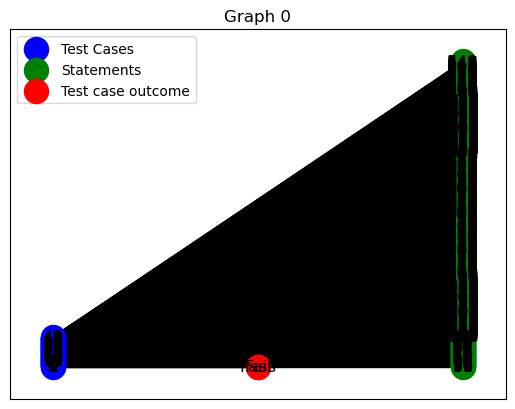

552
12507


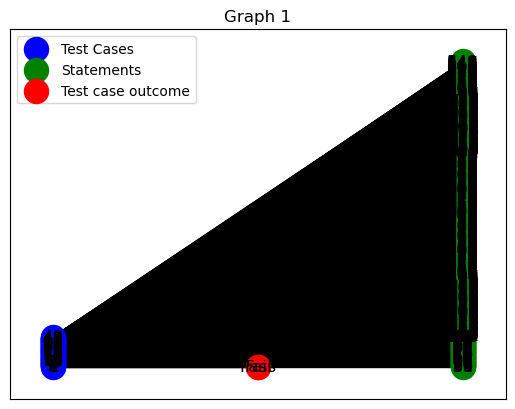

552
12557


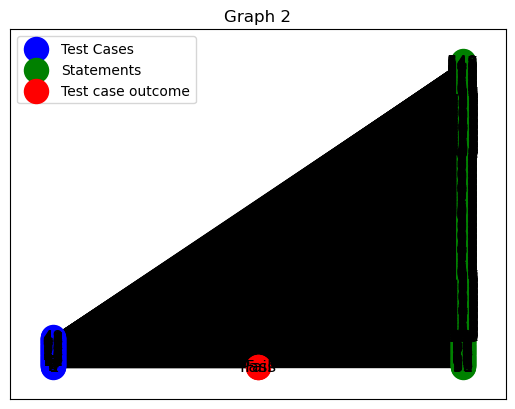

552
12474


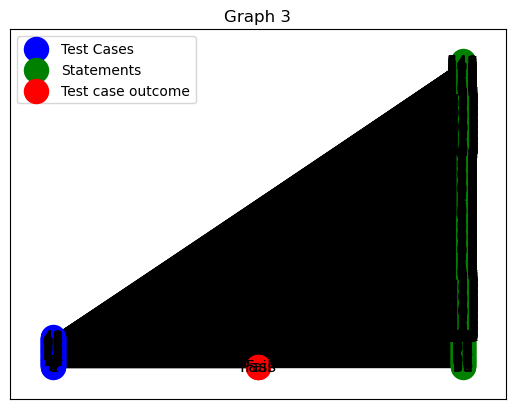

552
12586


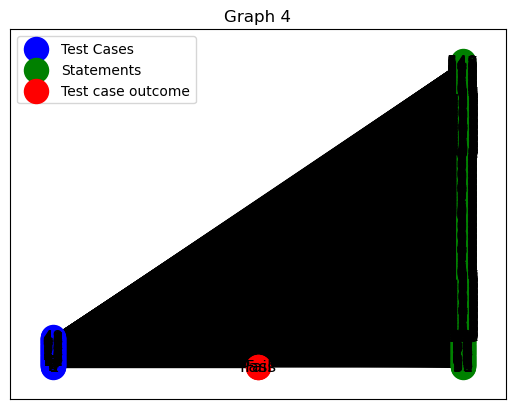

In [15]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import os

# Function to load a graph from a pickle file
def load_graph(file_path):
    with open(file_path, 'rb') as f:
        G = pickle.load(f)
    return G



# Directory where the graphs are stored
graphs_dir = 'graphs'


# Get list of graph files
graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]



# Visualize each graph individually
for i in range (0, 5):
    # Load the graph
    G = load_graph(os.path.join(graphs_dir, graph_files[i]))
    print(len(G.nodes()))
    print(len(G.edges()))
    
    # Separate nodes by type
    test_case_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 0]
    statement_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 1]
    bug_status_nodes = [n for n, d in G.nodes(data=True) if d['bipartite'] == 2]

    # Create positions for each set of nodes
    pos = {}
    pos.update((node, (1, index)) for index, node in enumerate(test_case_nodes))
    pos.update((node, (2, 0)) for node in bug_status_nodes)
    pos.update((node, (3, index)) for index, node in enumerate(statement_nodes))

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=test_case_nodes, node_color='b', label='Test Cases')
    nx.draw_networkx_nodes(G, pos, nodelist=statement_nodes, node_color='g', label='Statements')
    nx.draw_networkx_nodes(G, pos, nodelist=bug_status_nodes, node_color='r', label='Test case outcome')

    # Draw edges
    nx.draw_networkx_edges(G, pos)

    # Add labels
    nx.draw_networkx_labels(G, pos)

    # Add legend
    plt.legend()

    # Show plot
    plt.title(f'Graph {i}')
    plt.show()
   

In [17]:
import os
import pickle
import torch
import dgl
import networkx as nx
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Function to convert a bipartite graph to DGLGraph format
def convert_to_dgl_format(spectrum_matrix, bug_labels):
    num_test_cases, num_statements = spectrum_matrix.shape
    
    # Create a new DGLGraph
    g = dgl.graph(([], []), num_nodes=num_test_cases + num_statements)
    
    # Add edges between test case nodes and statement nodes based on spectrum
    src = []
    dst = []
    for i in range(num_test_cases):
        for j in range(num_statements):
            if spectrum_matrix[i][j] == 1:
                src.append(i)
                dst.append(num_test_cases + j)
    
    g.add_edges(src, dst)
    
    # Add self-loops to all nodes
    g = dgl.add_self_loop(g)
    
    # Add node features (spectrum matrix)
    features = torch.zeros((num_test_cases + num_statements, num_statements), dtype=torch.float)
    features[:num_test_cases, :] = torch.tensor(spectrum_matrix, dtype=torch.float)
    g.ndata['x'] = features
    
    # Add labels (bug labels)
    labels = torch.zeros((num_test_cases + num_statements, 1), dtype=torch.float)
    labels[:num_test_cases, 0] = torch.tensor(bug_labels, dtype=torch.float)
    g.ndata['y'] = labels
    
    return g

# Load and preprocess the dataset of graphs
def load_and_preprocess_dataset(graphs_dir):
    graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]
    
    
    for graph_file in graph_files:
        with open(os.path.join(graphs_dir, graph_file), 'rb') as f:
            G = pickle.load(f)
        
        # Extract spectrum and bug labels from G (assuming you have stored these in G)
        spectrum_matrix =  dataset[i][0] 
        bug_labels =   dataset[i][1]  
        
        # Convert to DGLGraph format
        dgl_graph = convert_to_dgl_format(spectrum_matrix, bug_labels)
        
        dataset.append(dgl_graph)
    
    return dataset

# Define your GNN model
class GNNModel(nn.Module):
    def __init__(self, num_features, hidden_dim=64):
        super(GNNModel, self).__init__()
        self.conv1 = dgl.nn.GraphConv(num_features, hidden_dim, allow_zero_in_degree=True)
        self.conv2 = dgl.nn.GraphConv(hidden_dim, 1, allow_zero_in_degree=True)
    
    def forward(self, g, features):
        h = features
        h = torch.relu(self.conv1(g, h))
        h = self.conv2(g, h)
        return h

# Custom collate function for DataLoader
def collate_fn(batch):
    batched_graph = dgl.batch(batch)
    return batched_graph

# Custom loss function for SBFL
class CustomSBFLoss(nn.Module):
    def __init__(self):
        super(CustomSBFLoss, self).__init__()

    def forward(self, logits, labels):
        # logits: Tensor of predicted suspiciousness scores
        # labels: Tensor of ground truth (0 for non-buggy, 1 for buggy)
        
        # Step 1: Sort logits and corresponding labels by descending suspiciousness score
        sorted_indices = torch.argsort(logits, descending=True)
        sorted_labels = labels[sorted_indices]
        
        # Step 2: Calculate penalty for non-buggy statements appearing before the first buggy statement
        found_buggy = False
        wasted_effort = 0.0
        for i, label in enumerate(sorted_labels):
            if label == 1:  # Found a buggy statement
                found_buggy = True
                break
            else:  # Non-buggy statement
                wasted_effort += 1.0  # Penalize non-buggy statement
                
        # If no buggy statements are found, penalize the total number of statements
        if not found_buggy:
            wasted_effort = len(sorted_labels)

        # Convert to a tensor and set requires_grad to True to enable backpropagation
        loss = torch.tensor(wasted_effort, requires_grad=True)
        return loss

# Function to train the GNN model
def train_gnn_model(dataset, num_epochs=50, batch_size=32):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    model = GNNModel(num_features=dataset[0].ndata['x'].shape[1])  # Initialize the model
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = CustomSBFLoss()  # Use the custom loss function

    for epoch in range(num_epochs):
        model.train()
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            logits = model(batch, batch.ndata['x']).squeeze()
            labels = batch.ndata['y'].squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            
            # Print the output of the neural network
            #print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item()}")
            #print("Logits:", logits)
        
        # Print loss or validation metrics after each epoch if needed
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Example usage:
graphs_dir = 'graphs'  # Directory where the graphs are stored
dataset = load_and_preprocess_dataset(graphs_dir)
train_gnn_model(dataset)


AttributeError: 'list' object has no attribute 'shape'

In [20]:
import os
import pickle
import dgl
import torch
from torch.utils.data import DataLoader
from dgl.data.utils import load_graphs
import torch.optim as optim
import torch.nn as nn
import dgl.nn.pytorch as dglnn

def convert_to_dgl_format(G):
    # Convert node labels to consecutive integers
    mapping = {node: i for i, node in enumerate(G.nodes())}
    G = nx.relabel_nodes(G, mapping)
    
    g = dgl.from_networkx(G)
    
    # Add node features (spectrum matrix and bug labels)
    num_test_cases = len([n for n, d in G.nodes(data=True) if d['bipartite'] == 0])
    num_statements = len([n for n, d in G.nodes(data=True) if d['bipartite'] == 1])
    
    spectrum_matrix = torch.tensor(G.graph['spectrum_matrix'], dtype=torch.float)
    test_case_outcomes = torch.tensor(G.graph['test_case_outcomes'], dtype=torch.float)
    bug_labels = torch.zeros(len(G.nodes), dtype=torch.float)  # Adjust to total number of nodes
    
    for node, data in G.nodes(data=True):
        if data['bipartite'] == 1:
            bug_labels[node] = data['bug_label']
    
    # Create a feature matrix for the nodes
    num_total_nodes = num_test_cases + num_statements + 2  # Including "Bug" and "No Bug" nodes
    node_features = torch.zeros((num_total_nodes, spectrum_matrix.shape[1]))
    
    node_features[:num_test_cases, :] = spectrum_matrix  # Add spectrum matrix as features for test case nodes
    node_features[num_test_cases:num_test_cases + num_statements, :] = torch.zeros((num_statements, spectrum_matrix.shape[1]))  # Placeholder for statement nodes
    
    g.ndata['x'] = node_features
    g.ndata['y'] = bug_labels.view(-1, 1)
    
    return g

def load_and_preprocess_dataset(graphs_dir):
    dataset = []
    graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]
    
    for graph_file in graph_files:
        with open(os.path.join(graphs_dir, graph_file), 'rb') as f:
            G = pickle.load(f)
            dgl_graph = convert_to_dgl_format(G)
            dataset.append(dgl_graph)
    
    return dataset






class GCNModel(nn.Module):
    def __init__(self, in_feats, hidden_dim=64):
        super(GCNModel, self).__init__()
        self.conv1 = dglnn.GraphConv(in_feats, hidden_dim, allow_zero_in_degree=True)
        self.conv2 = dglnn.GraphConv(hidden_dim, 1, allow_zero_in_degree=True)
    
    def forward(self, g, features):
        h = torch.relu(self.conv1(g, features))
        h = self.conv2(g, h)
        return h


class CustomSBFLoss(nn.Module):
    def __init__(self):
        super(CustomSBFLoss, self).__init__()

    def forward(self, logits, labels):
        sorted_indices = torch.argsort(logits, descending=True)
        sorted_labels = labels[sorted_indices]
        
        found_buggy = False
        wasted_effort = 0.0
        for i, label in enumerate(sorted_labels):
            if label == 1:
                found_buggy = True
                break
            else:
                wasted_effort += 1.0
                
        if not found_buggy:
            wasted_effort = len(sorted_labels)

        loss = torch.tensor(wasted_effort, requires_grad=True)
        return loss


import torch.optim as optim

def collate_fn(batch):
    return dgl.batch(batch)

def train_gnn_model(dataset, num_epochs=50, batch_size=32):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    model = GCNModel(in_feats=dataset[0].ndata['x'].shape[1])  # Initialize the model
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = CustomSBFLoss()  # Use the custom loss function

    for epoch in range(num_epochs):
        model.train()
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            logits = model(batch, batch.ndata['x']).squeeze()
            labels = batch.ndata['y'].squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')


        
# Load the dataset
graphs_dir = 'graphs'  # Directory where the graphs are stored
dataset = load_and_preprocess_dataset(graphs_dir)

# Train the GCN model
train_gnn_model(dataset)






Epoch [1/50], Loss: 459.0
Epoch [2/50], Loss: 424.0
Epoch [3/50], Loss: 438.0
Epoch [4/50], Loss: 310.0
Epoch [5/50], Loss: 248.0
Epoch [6/50], Loss: 265.0
Epoch [7/50], Loss: 164.0
Epoch [8/50], Loss: 425.0
Epoch [9/50], Loss: 200.0
Epoch [10/50], Loss: 526.0
Epoch [11/50], Loss: 307.0
Epoch [12/50], Loss: 346.0
Epoch [13/50], Loss: 512.0
Epoch [14/50], Loss: 276.0
Epoch [15/50], Loss: 145.0
Epoch [16/50], Loss: 539.0
Epoch [17/50], Loss: 61.0
Epoch [18/50], Loss: 273.0
Epoch [19/50], Loss: 8.0
Epoch [20/50], Loss: 425.0
Epoch [21/50], Loss: 517.0
Epoch [22/50], Loss: 483.0
Epoch [23/50], Loss: 123.0
Epoch [24/50], Loss: 512.0
Epoch [25/50], Loss: 427.0
Epoch [26/50], Loss: 258.0
Epoch [27/50], Loss: 31.0
Epoch [28/50], Loss: 406.0
Epoch [29/50], Loss: 145.0
Epoch [30/50], Loss: 217.0
Epoch [31/50], Loss: 165.0
Epoch [32/50], Loss: 530.0
Epoch [33/50], Loss: 88.0
Epoch [34/50], Loss: 446.0
Epoch [35/50], Loss: 175.0
Epoch [36/50], Loss: 190.0
Epoch [37/50], Loss: 368.0
Epoch [38/50], 

In [21]:
import os
import pickle
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import dgl
from dgl.data import DGLDataset
from dgl.dataloading import GraphDataLoader
import networkx as nx
import numpy as np

# Custom loss function
class CustomSBFLoss(nn.Module):
    def __init__(self):
        super(CustomSBFLoss, self).__init__()
        self.mse_loss = nn.MSELoss()

    def forward(self, predictions, targets):
        return self.mse_loss(predictions, targets)

# GCN model
class GCNModel(nn.Module):
    def __init__(self, in_feats, h_feats=16):
        super(GCNModel, self).__init__()
        self.conv1 = dgl.nn.GraphConv(in_feats, h_feats)
        self.conv2 = dgl.nn.GraphConv(h_feats, 1)

    def forward(self, g, in_feat):
        h = self.conv1(g, in_feat)
        h = F.relu(h)
        h = self.conv2(g, h)
        return h

# Convert NetworkX graph to DGL format
def convert_to_dgl_format(G):
    mapping = {node: i for i, node in enumerate(G.nodes())}
    G = nx.relabel_nodes(G, mapping)

    g = dgl.from_networkx(G)
    
    num_test_cases = len([n for n, d in G.nodes(data=True) if d['bipartite'] == 0])
    num_statements = len([n for n, d in G.nodes(data=True) if d['bipartite'] == 1])
    
    spectrum_matrix = torch.tensor(G.graph['spectrum_matrix'], dtype=torch.float)
    test_case_outcomes = torch.tensor(G.graph['test_case_outcomes'], dtype=torch.float)
    bug_labels = torch.zeros(len(G.nodes), dtype=torch.float)
    
    for node, data in G.nodes(data=True):
        if data['bipartite'] == 1:
            bug_labels[node] = data['bug_label']
    
    num_total_nodes = num_test_cases + num_statements + 2
    node_features = torch.zeros((num_total_nodes, spectrum_matrix.shape[1]))
    
    node_features[:num_test_cases, :] = spectrum_matrix
    node_features[num_test_cases:num_test_cases + num_statements, :] = torch.zeros((num_statements, spectrum_matrix.shape[1]))
    
    g.ndata['x'] = node_features
    g.ndata['y'] = bug_labels.view(-1, 1)
    
    return g

# Load and preprocess dataset
def load_and_preprocess_dataset(graphs_dir):
    dataset = []
    graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]
    
    for graph_file in graph_files:
        with open(os.path.join(graphs_dir, graph_file), 'rb') as f:
            G = pickle.load(f)
            dgl_graph = convert_to_dgl_format(G)
            dataset.append(dgl_graph)
    
    return dataset

# DataLoader collate function
def collate_fn(batch):
    return dgl.batch(batch)

# Train GCN model
def train_gnn_model(dataset, num_epochs=50, batch_size=32):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    model = GCNModel(in_feats=dataset[0].ndata['x'].shape[1])
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = CustomSBFLoss()

    for epoch in range(num_epochs):
        model.train()
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            logits = model(batch, batch.ndata['x']).squeeze()
            labels = batch.ndata['y'].squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Load the dataset
graphs_dir = 'graphs'
dataset = load_and_preprocess_dataset(graphs_dir)

# Train the GCN model
train_gnn_model(dataset)


Epoch [1/50], Loss: 0.004234091844409704
Epoch [2/50], Loss: 0.0030658578034490347
Epoch [3/50], Loss: 0.002494873246178031
Epoch [4/50], Loss: 0.0031177212949842215
Epoch [5/50], Loss: 0.002231161342933774
Epoch [6/50], Loss: 0.0026338316965848207
Epoch [7/50], Loss: 0.0027656613383442163
Epoch [8/50], Loss: 0.0019803063478320837
Epoch [9/50], Loss: 0.0027595250867307186
Epoch [10/50], Loss: 0.001980419270694256
Epoch [11/50], Loss: 0.002457222668454051
Epoch [12/50], Loss: 0.0025347606278955936
Epoch [13/50], Loss: 0.0019693339709192514
Epoch [14/50], Loss: 0.0022020316682755947
Epoch [15/50], Loss: 0.0024380027316510677
Epoch [16/50], Loss: 0.0020130604971200228
Epoch [17/50], Loss: 0.0020613817032426596
Epoch [18/50], Loss: 0.0020099510438740253
Epoch [19/50], Loss: 0.0021922020241618156
Epoch [20/50], Loss: 0.002207574900239706
Epoch [21/50], Loss: 0.0027760311495512724
Epoch [22/50], Loss: 0.002437384333461523
Epoch [23/50], Loss: 0.002142434474080801
Epoch [24/50], Loss: 0.00264

In [8]:
import os
import pickle
import torch
import dgl
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Function to convert a bipartite graph to DGLGraph format
def convert_to_dgl_format(spectrum_matrix, bug_labels):
    num_test_cases, num_statements = spectrum_matrix.shape
    
    # Create a new DGLGraph
    g = dgl.graph(([], []), num_nodes=num_test_cases + num_statements)
    
    # Add edges between test case nodes and statement nodes based on spectrum
    src = []
    dst = []
    for i in range(num_test_cases):
        for j in range(num_statements):
            if spectrum_matrix[i][j] == 1:
                src.append(i)
                dst.append(num_test_cases + j)
    
    g.add_edges(src, dst)
    
    # Add self-loops to all nodes
    g = dgl.add_self_loop(g)
    
    # Add node features (spectrum matrix)
    features = torch.zeros((num_test_cases + num_statements, num_statements), dtype=torch.float)
    features[:num_test_cases, :] = torch.tensor(spectrum_matrix, dtype=torch.float)
    g.ndata['x'] = features
    
    # Add labels (bug labels)
    labels = torch.zeros((num_test_cases + num_statements, 1), dtype=torch.float)
    labels[:num_test_cases, 0] = torch.tensor(bug_labels, dtype=torch.float)
    g.ndata['y'] = labels
    
    return g

# Load and preprocess the dataset of graphs
def load_and_preprocess_dataset(graphs_dir):
    graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]
    dataset = []
    
    for graph_file in graph_files:
        with open(os.path.join(graphs_dir, graph_file), 'rb') as f:
            G = pickle.load(f)
        
        # Extract spectrum and bug labels from G (assuming you have stored these in G)
        spectrum_matrix = G['spectrum_matrix']  # Replace with actual key if different
        bug_labels = G['bug_labels']  # Replace with actual key if different
        
        # Convert to DGLGraph format
        dgl_graph = convert_to_dgl_format(spectrum_matrix, bug_labels)
        
        dataset.append(dgl_graph)
    
    return dataset

# Define your GNN model
class GNNModel(nn.Module):
    def __init__(self, num_features, hidden_dim=64):
        super(GNNModel, self).__init__()
        self.conv1 = dgl.nn.GraphConv(num_features, hidden_dim, allow_zero_in_degree=True)
        self.conv2 = dgl.nn.GraphConv(hidden_dim, 1, allow_zero_in_degree=True)
    
    def forward(self, g, features):
        h = features
        h = torch.relu(self.conv1(g, h))
        h = self.conv2(g, h)
        return h

# Custom collate function for DataLoader
def collate_fn(batch):
    batched_graph = dgl.batch(batch)
    return batched_graph

# Custom loss function for SBFL
class CustomSBFLoss(nn.Module):
    def __init__(self):
        super(CustomSBFLoss, self).__init__()
        self.bce_loss = nn.BCEWithLogitsLoss()

    def forward(self, logits, labels):
        logits = logits.squeeze()
        labels = labels.squeeze()
        return self.bce_loss(logits, labels)

# Function to train the GNN model
def train_gnn_model(dataset, num_epochs=50, batch_size=32):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    model = GNNModel(num_features=dataset[0].ndata['x'].shape[1])  # Initialize the model
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = CustomSBFLoss()  # Use the custom loss function

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            logits = model(batch, batch.ndata['x']).squeeze()
            labels = batch.ndata['y'].squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        # Print loss or validation metrics after each epoch if needed
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader)}')

# Example usage:
graphs_dir = 'graphs'  # Directory where the graphs are stored
dataset = load_and_preprocess_dataset(graphs_dir)
train_gnn_model(dataset)


KeyError: 'spectrum_matrix'

In [29]:
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Dataset class
class SBFLDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        spectrum_matrix, buggy_statements, outcomes = self.dataset[idx]
        return torch.tensor(spectrum_matrix, dtype=torch.float), buggy_statements, torch.tensor(outcomes, dtype=torch.float)


sbfl_dataset = SBFLDataset(dataset)

# Neural Network Model
class SBFLModel(nn.Module):
    def __init__(self, num_test_cases, num_statements):
        super(SBFLModel, self).__init__()
        self.fc1 = nn.Linear(num_test_cases * num_statements + num_test_cases, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, num_statements)

    def forward(self, spectrum_matrix, outcomes):
        # Flatten the spectrum matrix and concatenate with outcomes
        batch_size = spectrum_matrix.size(0)
        flattened_spectrum = spectrum_matrix.view(batch_size, -1)
        x = torch.cat((flattened_spectrum, outcomes), dim=1)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Custom Loss Function
class CustomSBFLoss(nn.Module):
    def __init__(self):
        super(CustomSBFLoss, self).__init__()

    def forward(self, logits, buggy_statements):
        batch_size = logits.size(0)
        total_loss = 0.0
        
        for i in range(batch_size):
            logit = logits[i]
            buggy_statement = buggy_statements[i]
            
            # Sort logits by descending suspiciousness score
            sorted_indices = torch.argsort(logit, descending=True)
            
            # Create a set of buggy statement indices for quick lookup
            buggy_set = set(buggy_statement)
            
            # Calculate penalty for non-buggy statements appearing before the first buggy statement
            wasted_effort = 0.0
            for idx in sorted_indices:
                if idx.item() in buggy_set:  # Found a buggy statement
                    break
                else:  # Non-buggy statement
                    wasted_effort += 1.0  # Penalize non-buggy statement
            
            # If no buggy statements are found, penalize the total number of statements
            if not any(idx.item() in buggy_set for idx in sorted_indices):
                wasted_effort = len(sorted_indices)

            total_loss += wasted_effort

        # Convert to a tensor and set requires_grad to True to enable backpropagation
        loss = torch.tensor(total_loss, requires_grad=True) / batch_size
        return loss

# Train the Model
def train_sbfl_model(dataset, num_epochs=50, batch_size=32, learning_rate=0.001):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = SBFLModel(num_test_cases=num_test_cases, num_statements=num_statements)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = CustomSBFLoss()  # Use the custom loss function

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0.0
        for i, (spectrum_matrix, buggy_statements, outcomes) in enumerate(train_loader):
            optimizer.zero_grad()
            logits = model(spectrum_matrix, outcomes).squeeze()
            loss = criterion(logits, buggy_statements)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader)}')

# Train the model
train_sbfl_model(sbfl_dataset)


IndexError: list index out of range

In [67]:
import os
import shutil
import random

# Directories
graphs_dir = 'graphs'
train_dir = 'graphs_train'
val_dir = 'graphs_val'
test_dir = 'graphs_test'

# Create directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get list of all graph files
graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]

# Shuffle the list to ensure random distribution
random.shuffle(graph_files)

# Split into train, validation, and test sets
train_files = graph_files[:3000]
val_files = graph_files[3000:4000]
test_files = graph_files[4000:]

# Function to copy files to a directory
def copy_files(files, source_dir, dest_dir):
    for file in files:
        shutil.copy(os.path.join(source_dir, file), os.path.join(dest_dir, file))

# Copy files to respective directories
copy_files(train_files, graphs_dir, train_dir)
copy_files(val_files, graphs_dir, val_dir)
copy_files(test_files, graphs_dir, test_dir)

print(f"Training files: {len(train_files)}")
print(f"Validation files: {len(val_files)}")
print(f"Testing files: {len(test_files)}")


Training files: 3000
Validation files: 1000
Testing files: 1000


In [69]:
import os
import pickle
import torch
import dgl
import networkx as nx
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# Function to convert a bipartite graph to DGLGraph format
def convert_to_dgl_format(spectrum_matrix, bug_labels):
    num_test_cases, num_statements = spectrum_matrix.shape
    
    # Create a new DGLGraph
    g = dgl.graph(([], []), num_nodes=num_test_cases + num_statements)
    
    # Add edges between test case nodes and statement nodes based on spectrum
    src = []
    dst = []
    for i in range(num_test_cases):
        for j in range(num_statements):
            if spectrum_matrix[i][j] == 1:
                src.append(i)
                dst.append(num_test_cases + j)
    
    g.add_edges(src, dst)
    
    # Add self-loops to all nodes
    g = dgl.add_self_loop(g)
    
    # Add node features (spectrum matrix)
    features = torch.zeros((num_test_cases + num_statements, num_statements), dtype=torch.float)
    features[:num_test_cases, :] = torch.tensor(spectrum_matrix, dtype=torch.float)
    g.ndata['x'] = features
    
    # Add labels (bug labels)
    labels = torch.zeros((num_test_cases + num_statements, 1), dtype=torch.float)
    labels[:num_test_cases, 0] = torch.tensor(bug_labels, dtype=torch.float)
    g.ndata['y'] = labels
    
    return g

# Load and preprocess the dataset of graphs
def load_and_preprocess_dataset(graphs_dir):
    graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]
    dataset = []
    
    for graph_file in graph_files:
        with open(os.path.join(graphs_dir, graph_file), 'rb') as f:
            G = pickle.load(f)
        
        # Extract spectrum and bug labels from G (assuming you have stored these in G)
        spectrum_matrix = np.random.randint(0, 2, size=(50, 500))  # Replace with actual data
        bug_labels = np.random.randint(0, 2, size=50)  # Replace with actual data
        
        # Convert to DGLGraph format
        dgl_graph = convert_to_dgl_format(spectrum_matrix, bug_labels)
        
        dataset.append(dgl_graph)
    
    return dataset
# Load datasets
train_dataset = load_and_preprocess_dataset(train_dir)
val_dataset = load_and_preprocess_dataset(val_dir)
test_dataset = load_and_preprocess_dataset(test_dir)


In [70]:

# Define your GNN model
class GNNModel(nn.Module):
    def __init__(self, num_features, hidden_dim=64):
        super(GNNModel, self).__init__()
        self.conv1 = dgl.nn.GraphConv(num_features, hidden_dim, allow_zero_in_degree=True)
        self.conv2 = dgl.nn.GraphConv(hidden_dim, 1, allow_zero_in_degree=True)
    
    def forward(self, g, features):
        h = features
        h = torch.relu(self.conv1(g, h))
        h = self.conv2(g, h)
        return h
# Define GNNModel, train_gnn_model, and any other necessary functions from the previous examples

# Custom collate function for DataLoader
def collate_fn(batch):
    batched_graph = dgl.batch(batch)
    return batched_graph

# Training function
def train_gnn_model(train_dataset, val_dataset, num_epochs=50, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=lambda x: dgl.batch(x))
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, collate_fn=lambda x: dgl.batch(x))
    
    model = GNNModel(input_dim=500, hidden_dim=256, output_dim=1)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.BCEWithLogitsLoss()
    
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            logits = model(batch, batch.ndata['x'])
            labels = batch.ndata['y']
            loss = criterion(logits.squeeze(), labels.squeeze())
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        
        avg_loss = total_loss / len(train_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")
        
        # Validate the model
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                logits = model(batch, batch.ndata['x'])
                labels = batch.ndata['y']
                loss = criterion(logits.squeeze(), labels.squeeze())
                val_loss += loss.item()
        
        avg_val_loss = val_loss / len(val_loader)
        print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss:.4f}")

# Train the model
train_gnn_model(train_dataset, val_dataset)

# Testing function (optional)
def test_gnn_model(test_dataset):
    test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False, collate_fn=lambda x: dgl.batch(x))
    model = GNNModel(input_dim=500, hidden_dim=256, output_dim=1)
    model.load_state_dict(torch.load('gnn_model.pth'))  # Load your trained model
    model.eval()
    total_correct = 0
    with torch.no_grad():
        for batch in test_loader:
            logits = model(batch, batch.ndata['x'])
            labels = batch.ndata['y']
            predicted = (torch.sigmoid(logits) > 0.5).float()
            total_correct += (predicted == labels).sum().item()
    
    accuracy = total_correct / len(test_loader.dataset)
    print(f"Test Accuracy: {accuracy:.4f}")

# Test the model
test_gnn_model(test_dataset)


TypeError: GNNModel.__init__() got an unexpected keyword argument 'input_dim'

In [8]:
import os
import pickle
import torch
import dgl
import networkx as nx
import numpy as np
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Function to convert a bipartite graph to DGLGraph format
def convert_to_dgl_format(spectrum_matrix, bug_labels):
    num_test_cases, num_statements = spectrum_matrix.shape
    
    # Create a new DGLGraph
    g = dgl.graph(([], []), num_nodes=num_test_cases + num_statements)
    
    # Add edges between test case nodes and statement nodes based on spectrum
    src = []
    dst = []
    for i in range(num_test_cases):
        for j in range(num_statements):
            if spectrum_matrix[i][j] == 1:
                src.append(i)
                dst.append(num_test_cases + j)
    
    g.add_edges(src, dst)
    
    # Add self-loops to all nodes
    g = dgl.add_self_loop(g)
    
    # Add node features (spectrum matrix)
    features = torch.zeros((num_test_cases + num_statements, num_statements), dtype=torch.float)
    features[:num_test_cases, :] = torch.tensor(spectrum_matrix, dtype=torch.float)
    g.ndata['x'] = features
    
    # Add labels (bug labels)
    labels = torch.zeros((num_test_cases + num_statements, 1), dtype=torch.float)
    labels[:num_test_cases, 0] = torch.tensor(bug_labels, dtype=torch.float)
    g.ndata['y'] = labels
    
    return g

# Load and preprocess the dataset of graphs
def load_and_preprocess_dataset(graphs_dir):
    graph_files = [f for f in os.listdir(graphs_dir) if f.endswith('.pickle')]
    dataset = []
    
    for graph_file in graph_files:
        with open(os.path.join(graphs_dir, graph_file), 'rb') as f:
            G = pickle.load(f)
        
        # Extract spectrum and bug labels from G (assuming you have stored these in G)
        spectrum_matrix = np.random.randint(0, 2, size=(50, 500))  # Replace with actual data
        bug_labels = np.random.randint(0, 2, size=50)  # Replace with actual data
        
        # Convert to DGLGraph format
        dgl_graph = convert_to_dgl_format(spectrum_matrix, bug_labels)
        
        dataset.append(dgl_graph)
    
    return dataset

# Define your GNN model
class GNNModel(nn.Module):
    def __init__(self, num_features, hidden_dim=64):
        super(GNNModel, self).__init__()
        self.conv1 = dgl.nn.GraphConv(num_features, hidden_dim, allow_zero_in_degree=True)
        self.conv2 = dgl.nn.GraphConv(hidden_dim, 1, allow_zero_in_degree=True)
    
    def forward(self, g, features):
        h = features
        h = torch.relu(self.conv1(g, h))
        h = self.conv2(g, h)
        return h

# Custom collate function for DataLoader
def collate_fn(batch):
    batched_graph = dgl.batch(batch)
    return batched_graph

# Function to train the GNN model
def train_gnn_model(dataset, num_epochs=50, batch_size=32):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    model = GNNModel(num_features=dataset[0].ndata['x'].shape[1])  # Initialize the model
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss with logits

    for epoch in range(num_epochs):
        model.train()
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            logits = model(batch, batch.ndata['x']).squeeze()
            labels = batch.ndata['y'].squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            
            # Print the output of the neural network
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item()}")
            print("Logits:", logits)
        
        # Print loss or validation metrics after each epoch if needed
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Example usage:
graphs_dir = 'graphs'  # Directory where the graphs are stored
dataset = load_and_preprocess_dataset(graphs_dir)
train_gnn_model(dataset)


Epoch [1/50], Batch [1/32], Loss: 0.7093328833580017
Logits: tensor([ 0.0021, -0.0007,  0.0015,  ...,  0.0341,  0.0310,  0.0361],
       grad_fn=<SqueezeBackward0>)
Epoch [1/50], Batch [2/32], Loss: 0.6792421340942383
Logits: tensor([-0.0024, -0.0028, -0.0051,  ..., -0.0342, -0.0267, -0.0298],
       grad_fn=<SqueezeBackward0>)
Epoch [1/50], Batch [3/32], Loss: 0.6518663167953491
Logits: tensor([-0.0071, -0.0092, -0.0077,  ..., -0.0966, -0.1011, -0.1024],
       grad_fn=<SqueezeBackward0>)
Epoch [1/50], Batch [4/32], Loss: 0.6274996399879456
Logits: tensor([-0.0118, -0.0098, -0.0120,  ..., -0.1436, -0.1423, -0.1345],
       grad_fn=<SqueezeBackward0>)
Epoch [1/50], Batch [5/32], Loss: 0.6020605564117432
Logits: tensor([-0.0148, -0.0162, -0.0152,  ..., -0.2129, -0.2112, -0.1985],
       grad_fn=<SqueezeBackward0>)
Epoch [1/50], Batch [6/32], Loss: 0.5764575004577637
Logits: tensor([-0.0202, -0.0162, -0.0164,  ..., -0.2686, -0.2740, -0.2549],
       grad_fn=<SqueezeBackward0>)
Epoch [1/5

In [75]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
import dgl

# Custom loss function to minimize wastage of work
class CustomLoss(nn.Module):
    def __init__(self, weight_false_positive=1.0, weight_false_negative=1.0):
        super(CustomLoss, self).__init__()
        self.weight_false_positive = weight_false_positive  # Weight for false positive penalty
        self.weight_false_negative = weight_false_negative  # Weight for false negative penalty
    
    def forward(self, logits, labels):
        # Calculate Binary Cross-Entropy Loss
        bce_loss = F.binary_cross_entropy_with_logits(logits, labels)
        
        # Penalize false positives and false negatives
        predicted_labels = torch.sigmoid(logits)  # Convert logits to probabilities
        predicted_labels_binary = torch.round(predicted_labels)  # Binary predictions
        
        # False positives penalty
        false_positives = torch.logical_and(predicted_labels_binary == 1, labels == 0).float()
        fp_penalty = torch.sum(false_positives) * self.weight_false_positive
        
        # False negatives penalty (for statements that are buggy but predicted as non-buggy)
        false_negatives = torch.logical_and(predicted_labels_binary == 0, labels == 1).float()
        fn_penalty = torch.sum(false_negatives) * self.weight_false_negative
        
        # Total loss
        total_loss = bce_loss + fp_penalty + fn_penalty
        
        return total_loss

# Function to train the GNN model
def train_gnn_model(dataset, num_epochs=50, batch_size=32):
    train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)
    model = GNNModel(num_features=dataset[0].ndata['x'].shape[1])  # Initialize the model
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    criterion = CustomLoss(weight_false_positive=2.0, weight_false_negative=5.0)  # Custom loss function with penalty weights
    
    for epoch in range(num_epochs):
        model.train()
        for i, batch in enumerate(train_loader):
            optimizer.zero_grad()
            logits = model(batch, batch.ndata['x']).squeeze()
            labels = batch.ndata['y'].squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
            
            # Print the output of the neural network
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_loader)}], Loss: {loss.item()}")
            print("Logits:", logits)
        
        # Print loss or validation metrics after each epoch if needed
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}')

# Example usage:
graphs_dir = 'graphs'  # Directory where the graphs are stored
dataset = load_and_preprocess_dataset(graphs_dir)
train_gnn_model(dataset)



TypeError: 'str' object is not callable